In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Data/Intermediate/CDCSTDoverall2000_2020_processed.csv")

In [3]:
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,rate_per_100000_male_gonorrhea_multiracial,rate_per_100000_male_gonorrhea_native_hawaiian_other_pacific_islander,rate_per_100000_male_gonorrhea_white,rate_per_100000_male_primary_and_secondary_syphilis_american_indian_alaska_native,rate_per_100000_male_primary_and_secondary_syphilis_asian,rate_per_100000_male_primary_and_secondary_syphilis_black_african_american,rate_per_100000_male_primary_and_secondary_syphilis_hispanic_latino,rate_per_100000_male_primary_and_secondary_syphilis_multiracial,rate_per_100000_male_primary_and_secondary_syphilis_native_hawaiian_other_pacific_islander,rate_per_100000_male_primary_and_secondary_syphilis_white
0,0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

C:\Users\philb\AppData\Local\Temp\ipykernel_27656\3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [5]:
df_sum.head()

,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis
0,2000,211146.0,382937.0,9989.0,6117.0
1,2001,245376.0,487710.0,9262.0,6287.0
2,2002,345771.0,813734.0,9064.0,7089.0
3,2003,332157.0,869687.0,8989.0,7352.0
4,2004,327207.0,921261.0,8101.0,8152.0


### Chlamydia time series

In [6]:
df = df_sum[['year','cases_chlamydia']]

In [7]:
df = df.drop(labels=[20,0,1], axis=0)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

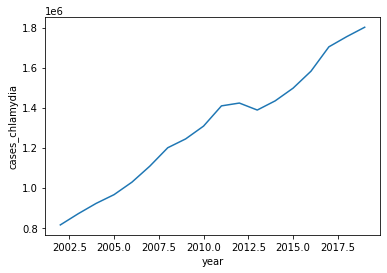

In [9]:
sns.lineplot(data = df,x="year",y="cases_chlamydia")
plt.show()

In [10]:
from scipy import signal

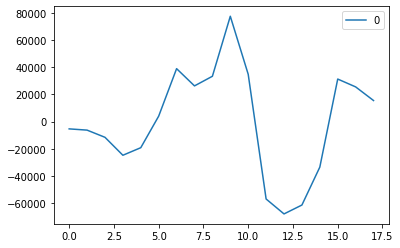

In [11]:
detrended = signal.detrend(df.cases_chlamydia)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [12]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\philb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


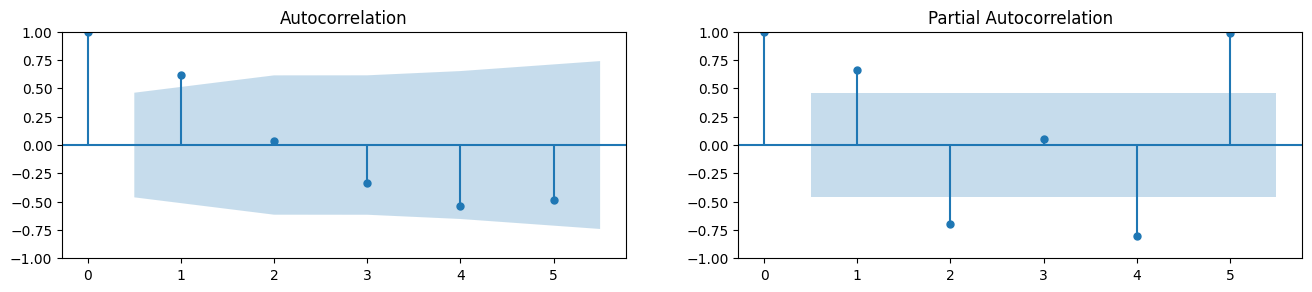

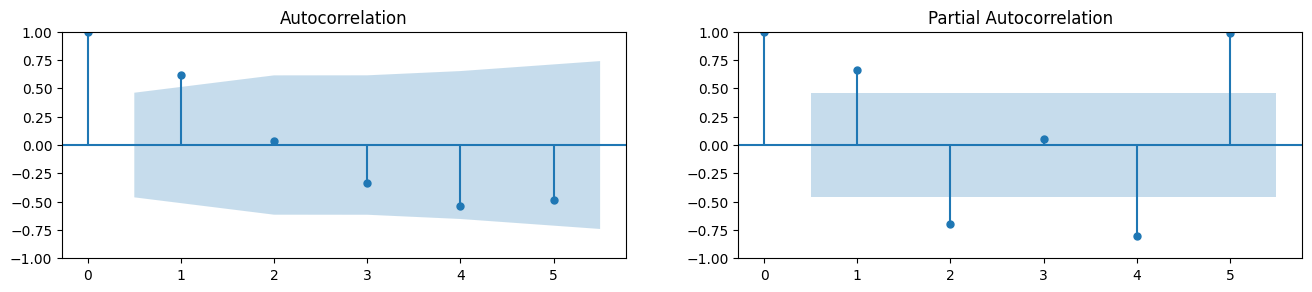

In [13]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_df[0].tolist(), lags=5, ax=axes[0])
plot_pacf(detrended_df[0].tolist(), lags=5, ax=axes[1])

In [14]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(0,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -201.534
Date:                Wed, 20 Jul 2022   AIC                            405.068
Time:                        16:35:55   BIC                            405.901
Sample:                             0   HQIC                           405.151
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.094e+09   2.75e+08      3.973      0.000    5.54e+08    1.63e+09
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                 2.98
Prob(Q):                              0.22   Pr

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(2,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -190.504
Date:                Wed, 20 Jul 2022   AIC                            387.009
Time:                        16:35:55   BIC                            389.326
Sample:                             0   HQIC                           387.127
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1732      0.279     -0.621      0.535      -0.720       0.374
ar.L2         -0.5801      0.227     -2.555      0.011      -1.025      -0.135
sigma2      1.453e+09   4.71e-11   3.08e+19      0.0

### Gonorrhea time series

In [16]:
df = df_sum[['year','cases_gonorrhea']]

In [17]:
df = df.drop(labels=[20,0,1], axis=0)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns 

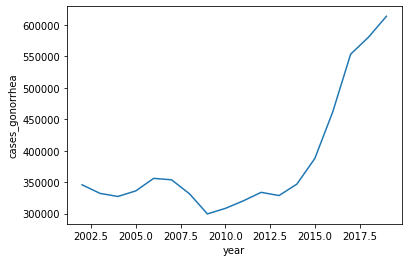

In [19]:
sns.lineplot(data = df,x="year",y="cases_gonorrhea")
plt.show()

In [20]:
from scipy import signal

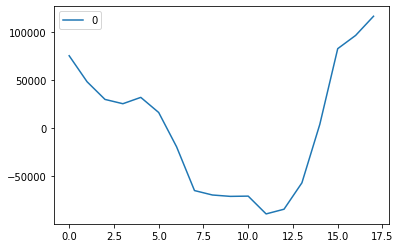

In [21]:
detrended = signal.detrend(df.cases_gonorrhea)
detrended_df = pd.DataFrame(detrended)
detrended_df.plot()
plt.show()

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\philb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


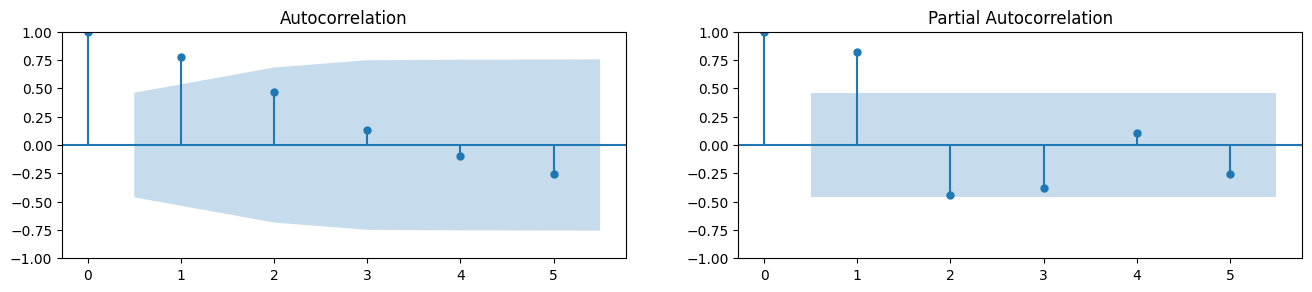

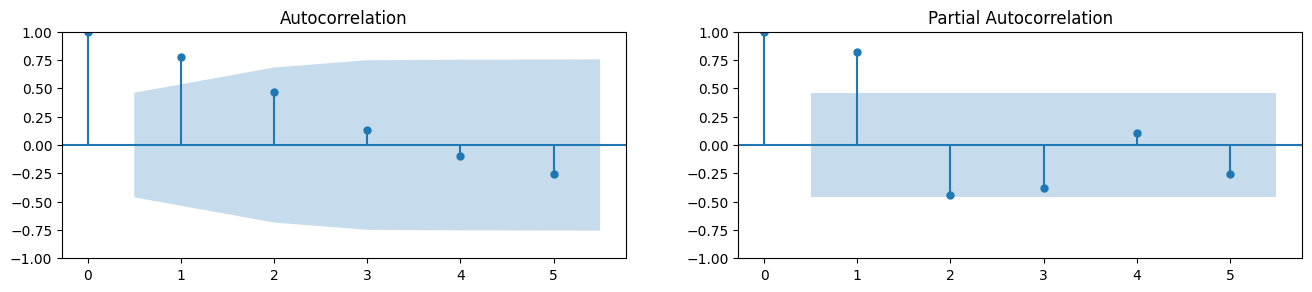

In [23]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(detrended_df[0].tolist(), lags=5, ax=axes[0])
plot_pacf(detrended_df[0].tolist(), lags=5, ax=axes[1])

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(2,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -184.344
Date:                Wed, 20 Jul 2022   AIC                            374.687
Time:                        16:35:57   BIC                            377.005
Sample:                             0   HQIC                           374.806
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0981      0.311     -0.316      0.752      -0.707       0.511
ar.L2         -0.1755      0.267     -0.659      0.510      -0.698       0.347
sigma2      6.374e+08   1.72e-10    3.7e+18      0.0

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(detrended_df[0], order=(0,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   18
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -184.871
Date:                Wed, 20 Jul 2022   AIC                            371.743
Time:                        16:35:57   BIC                            372.515
Sample:                             0   HQIC                           371.782
                                 - 18                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.614e+08   1.55e+08      3.616      0.000    2.57e+08    8.66e+08
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.95   Pr

In [26]:
data = pd.read_csv("../Data/Final/STI0220_cov20_pop0220.csv")
data.drop(columns=["Unnamed: 0"])
data.head()

,Unnamed: 0,year,fips,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_gonorrhea,cases_primary_and_secondary_syphilis,rate_per_100000_chlamydia,rate_per_100000_early_non-primary_non-secondary_syphilis,rate_per_100000_gonorrhea,...,pct_ind_transportation_and_warehousing_and_utilities,pct_ind_information,pct_ind_finance_and_insurance_and_real_estate_and_rental_and_leasing,pct_ind_professional_scientific_and_management_and_administrative_and_waste_management_services,pct_ind_educational_services_and_health_care_and_social_assistance,pct_ind_arts_entertainment_and_recreation_and_accommodation_and_food_services,pct_ind_other_services_except_public_administration,pct_ind_public_administration,health_insurance_rate,poverty_rate
0,0,2000,45001,61.0,1.0,57.0,2.0,232.6,3.8,217.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000,22001,0.0,8.0,0.0,11.0,0.0,13.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000,51001,153.0,2.0,88.0,0.0,398.7,5.2,229.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000,16001,644.0,0.0,33.0,1.0,212.3,0.0,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000,19001,8.0,0.0,0.0,0.0,97.6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()
df_sum.head()

C:\Users\philb\AppData\Local\Temp\ipykernel_27656\3978570435.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis
0,2000,211107.0,382743.0,9442.0,5967.0
1,2001,245354.0,487479.0,8705.0,6099.0
2,2002,345739.0,813390.0,8427.0,6863.0
3,2003,332124.0,869331.0,8357.0,7175.0
4,2004,327136.0,920962.0,7766.0,7977.0


In [28]:
df_model = df_sum[["year", "cases_chlamydia"]]
df_model["year"] = df_model["year"].astype(int)
actual_value = df_model.at[20, "cases_chlamydia"]
df_plot = df_model
df_model = df_model[df_model["year"] <= 2019]
df_model.head(21)

C:\Users\philb\AppData\Local\Temp\ipykernel_27656\859962695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["year"] = df_model["year"].astype(int)


,year,cases_chlamydia
0,2000,382743.0
1,2001,487479.0
2,2002,813390.0
3,2003,869331.0
4,2004,920962.0
5,2005,964523.0
6,2006,1021988.0
7,2007,1099171.0
8,2008,1191991.0
9,2009,1235784.0


In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_model["cases_chlamydia"], order=(2,2,0))
model_fit = model.fit()

In [30]:
 # summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        cases_chlamydia   No. Observations:                   20
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -231.431
Date:                Wed, 20 Jul 2022   AIC                            468.861
Time:                        16:35:59   BIC                            471.532
Sample:                             0   HQIC                           469.230
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3638      0.086     -4.214      0.000      -0.533      -0.195
ar.L2          0.1745      0.081      2.145      0.032       0.015       0.334
sigma2      1.689e+09   2.67e-11   6.33e+19      0.0

In [31]:
pred = model_fit.predict(20).to_frame()
fitted_value = pred.iloc[0][0]
print("Predicted: " + str(fitted_value) + " Actual: " + str(actual_value))

Predicted: 1837355.0071641896 Actual: 1578111.0


C:\Users\philb\AppData\Local\Temp\ipykernel_27656\1960092901.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


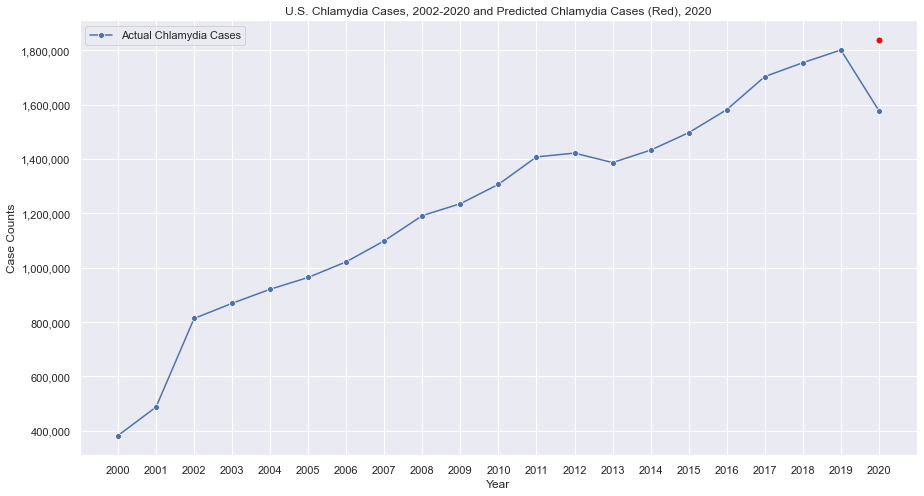

In [32]:
sns.set_theme()
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_plot, x = 'year', y = 'cases_chlamydia', marker = "o")
g.set_ylabel('Case Counts')
g.set_xlabel('Year')
g.set_xticks(df_sum['year'])
g.set_title("U.S. Chlamydia Cases, 2002-2020 and Predicted Chlamydia Cases (Red), 2020")
plt.legend(labels=["Actual Chlamydia Cases"])
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.scatter(2020, fitted_value, marker='o', s=25, c="red")
plt.savefig('../Output/PosterPresentation/ModelOutputs/arima_chlamydia.png',dpi=300)
plt.show()